## In this Exploratory Data Analysis, we are going to focus on data analyst jobs based on DataAnayst dataset.

First thig first, let's import our libraries that will be used. 

- The first two are our standard libraries for data manipulation; 
- The following three are main data visualization libraries; 
- The following 7 are plotly data visualization libraries and methods that enable us to create dynamic and interactive graphs; 
- The last one is for filtering warnings.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl 
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


import warnings
warnings.filterwarnings('ignore') 

# Knowing Dataset

As it is case with other areas or fields of different studies or professions, it is highly important to know your dataset before diving into analysis. First and foremost, we need to understand what we want to do with a given dataset and what can be done with it.




Let's read our csv dataset and have a look at basics of it

In [3]:
df = pd.read_csv("DataAnalyst.csv")

In [4]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [12]:
df.shape

(2253, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

It can be easily seen that even though we have information about the salary ('Salary Estimate'), it is not in the numeric version, same for 'Size' and 'Revenue'. Based on our research objects, we need to make some arrangements on abovementioned variables. 

# Preparing Dataset

- Is there any missing values?

In [6]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

At first glance, it seems that we have only one missing value. However, in the output of head() we can see (-1). Most of the time in the real world datasets, unknown and missing values are not recorded like sofware recognizable version of the missing value. In such cases we need to check, ddetect and deal with them. Let's define (-1) as missing value.

In [7]:
df.replace("-1", np.nan)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,NaN,NaN
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",NaN
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,NaN


As it can be seen above, we define str (-1)s as missing values. However, we are not done with missing value detection task yet. There are also numeric and float types of (-1)s in our dataset. Therefore, we need to deal with its  all versions before moving on to analysis. 

In [8]:
df.replace("-1", np.nan, inplace=True)
df.replace(-1, np.nan, inplace=True)
df.replace(-1.0, np.nan, inplace=True)

Now, let's recheck missing values in our dataset. 

In [9]:
df.isnull().sum()

Unnamed: 0              0
Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64

This time, it seems more realistic

In this analysis, we will concentrate on the following areas: 
- Job Title
- Salary Estimate
- Job Description
- Rating
- Company name
- Industry
- Sector

Let's start with **Job Title**

In [15]:
df["Job Title"].value_counts().head(20)

Data Analyst               405
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
Data Analyst Junior         17
Data Quality Analyst        17
Data Analyst II             17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Data Analyst I              11
Data Analyst III            11
Sr Data Analyst              9
Marketing Data Analyst       9
Data Warehouse Analyst       8
Data Management Analyst      8
Technical Data Analyst       7
Data Science Analyst         7
Name: Job Title, dtype: int64

If paid attention, it can be seen same jobs were named as if they are different jobs ("**Senior Data Analyst**" and "**Sr. Data Analyst**"). To have a healty analysis we need to rename this kind of namings. 

In [16]:
df["Job Title"] = df["Job Title"].str.replace("Sr. Data Analyst", "Senior Data Analyst")
df["Job Title"] = df["Job Title"].str.replace("Sr Data Analyst", "Senior Data Analyst")
df["Job Title"] = df["Job Title"].str.replace("Data Analyst Senior", "Senior Data Analyst")
df["Job Title"] = df["Job Title"].str.replace('Jr. Data Analyst','Junior Data Analyst')
df["Job Title"] = df["Job Title"].str.replace('Jr Data Analyst','Junior Data Analyst')
df["Job Title"] = df["Job Title"].str.replace('Data Analyst Junior','Junior Data Analyst')

In [18]:
df["Job Title"].value_counts()[:20]

Data Analyst               405
Senior Data Analyst        121
Junior Data Analyst         50
Business Data Analyst       28
Data Quality Analyst        17
Data Analyst II             17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Data Analyst I              11
Data Analyst III            11
Marketing Data Analyst       9
Data Management Analyst      8
Data Warehouse Analyst       8
SQL Data Analyst             7
Data Science Analyst         7
Technical Data Analyst       7
Research Data Analyst        6
Data Security Analyst        6
Name: Job Title, dtype: int64

In [19]:
df["Job Title"].isnull().sum()

0

So far so good with Job Title. Let's move on to **Salary Estimate**

In [20]:
df["Salary Estimate"].sample(5)

243       $45K-$88K (Glassdoor est.)
817       $42K-$76K (Glassdoor est.)
714     $113K-$132K (Glassdoor est.)
1837      $54K-$75K (Glassdoor est.)
42        $46K-$87K (Glassdoor est.)
Name: Salary Estimate, dtype: object

In [21]:
df["Salary Estimate"].isnull().sum()

1

It seems that we have one missing values. Due to fact that we will use "Salary Estimate" in our EDA in detail, we want all our rows to be full. And secondly, salary estimations are not in the form we want (it is object type and there are some signs like **$**, **K**).

Let's find the row with missing salary estimate.

In [23]:
df[df["Salary Estimate"].isnull()]

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2149,2149,Configuration/Data Management Analyst III,NaN,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001.0,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),NaN,NaN


There are several approaches to dealing with missing values such as dropping, replacing, or leaving them as they are. Here, replacing missing value with a salary estimate for a similiar job advertised by the same company. 

Let's we whether there is any other job ad by the same company

In [24]:
df[df["Company Name"] == "Protingent\n4.4"]

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
2123,2123,Engines Configuration and Data Management Analyst,$55K-$101K (Glassdoor est.),Job Description\nPosition Title: Engines Confi...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001.0,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),NaN,NaN
2149,2149,Configuration/Data Management Analyst III,NaN,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001.0,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),NaN,NaN


There is another ad by the same company.

In [25]:
df["Job Description"][2123]

'Job Description\nPosition Title: Engines Configuration and Data Management Analyst\n\nPosition Description: Protingent Staffing has an exciting contract opportunity with our client in Kent, WA.\n\nJob Qualifications:\nAA/AS or BA/BS in a related technical or liberal arts discipline\n3+ years of direct product configuration management experience (Product structure, parts, drawings, documents and requirements management)\n2+ years of experience working in a highly regulated environment (aerospace, nuclear, government, medical device, etc.)\nExperience working with software related to configuration management of complex product\nWorking knowledge of configuration management principles and practices\nFamiliar with product lifecycle management (PLM) and/or data management tools\nPossess high attention to detail and strong organizational/coordination skills\nProficient in Microsoft Office applications (Word, Excel, PowerPoint).\nExperience in aerospace industry\nProficient in technical writ

In [26]:
df["Job Description"][2149]

'Job Description\nPosition Title: Configuration/Data Management Analyst III\n\nPosition Description: Protingent has an opportunity for a Configuration Analyst in Kent, WA.\n\nJob Qualifications:\nAA/AS or BA/BS in a related technical or liberal arts discipline\n5-7 years of direct product configuration management experience (Product structure, parts, drawings and requirements management experience highly desired).\n3+ years of experience working in a highly regulated environment (security systems, medical device, aerospace, etc.).\nDeep experience with world-class toolsets for configuration management in complex products\nProven ability to communicate effectively both in writing and verbally with staff at all levels of the organization and external stakeholders, including regulatory agencies, customers and suppliers.\nExcellent technical writing and presentation skills.\nProficient with configuration management principles and practices\nProficient with product lifecycle management (PLM

Based on above job descriptions, there are some similarities between two job titles. However, when having a closer look, it can be inferred that job title with missing salary estimate needs more qualifications than the other job title does. Since we cannot make a sound estimation in such cases, it is better for us to drop missing value for the sake of our analysis. 

In [28]:
df.shape

(2253, 16)

In [29]:
df.drop(2149, inplace=True)

In [31]:
df["Salary Estimate"].isnull().sum()

0

In [32]:
df.shape

(2252, 16)

In [34]:
df["Salary Estimate"].sample(5)

1051     $43K-$94K (Glassdoor est.)
198     $60K-$110K (Glassdoor est.)
361     $77K-$132K (Glassdoor est.)
205     $60K-$110K (Glassdoor est.)
1213     $37K-$68K (Glassdoor est.)
Name: Salary Estimate, dtype: object

We need to get rid of those $ and K signs, convert object type into numeric value and change range into min, max, and average salary estimates to make our analysis more compatiable.

Let's get the numbers out of it and by using the numbers, let's make:

- maximum salary column
- minimum salary column
- average salary column

In [37]:
df["Salary Minimum"] = df["Salary Estimate"].str.lstrip("$").str[:3].str.replace("K", "").str.strip().astype("float")

In [40]:
df["Salary Maximum"] = df['Salary Estimate'].str[6:10].str.replace('K','').str.lstrip('$').str.strip().astype('float')

In [42]:
df["Salary Average"] = (df["Salary Maximum"] + df["Salary Minimum"]) / 2

Let's check what we have after changes we have made.

In [44]:
df[["Salary Estimate", "Salary Maximum", "Salary Minimum", "Salary Average"]].sample(5)

,Salary Estimate,Salary Maximum,Salary Minimum,Salary Average
933,$47K-$76K (Glassdoor est.),76.0,47.0,61.5
1137,$37K-$44K (Glassdoor est.),44.0,37.0,40.5
1560,$51K-$93K (Glassdoor est.),93.0,51.0,72.0
1303,$60K-$124K (Glassdoor est.),124.0,60.0,92.0
989,$53K-$94K (Glassdoor est.),94.0,53.0,73.5


All seems OK. Let move on to **Job Describtion**

In [47]:
df["Job Description"][0]

"Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sifting through complex datasets to illuminate trends and insights? Do you see yourself working for a values-driven organization with a vision to tackle the most pressing injustices of our day?\n\nWe are looking to hire a bright, hard-working, and creative individual with strong data management skills and a demonstrated commitment to immigrant's rights. The Data Analyst will assist with analysis and reporting needs for Veras Center on Immigration and Justice (CIJ), working across its current projects and future Vera initiatives.\n\nWho we are:\n\nFounded in 1961, The Vera Institute is an independent, non-partisan, nonprofit organization that combines expertise in research, technical assistance, and demonstration projects to assist leaders in government and civil society examine justice policy and practice, and improve the systems people rely on for justice and safety.\nWe study problems that im

It tells us about some specific about the given job. We will focus on Python, Excel, Tableau, and SQL skill requirements for a given job.

In [48]:
df["Job Description"].isnull().sum()

0

How many Jobs are there that require Python skills?

In [50]:
df["python"] = df["Job Description"].str.contains("python", na=False, case=False)
df["python"].value_counts()

False    1615
True      637
Name: python, dtype: int64

How many Jobs are there that require SQL skills?

In [51]:
df["SQL"] = df["Job Description"].str.contains("sql", na=False, case=False)
df["SQL"].value_counts()

True     1388
False     864
Name: SQL, dtype: int64

How many Jobs are there that require Excel skills?

In [53]:
df["Excel"] = df["Job Description"].str.contains("excel", na=False, case=False)
df["Excel"].value_counts()

True     1353
False     899
Name: Excel, dtype: int64

How many Jobs are there that require Tableau skills?

In [54]:
df["Tableau"] = df["Job Description"].str.contains("tableau", na=False, case=False)
df["Tableau"].value_counts()

False    1632
True      620
Name: Tableau, dtype: int64

It is time to move on to **Rating**

In [55]:
df.Rating.sample(5)

1172    4.2
1632    4.1
24      3.8
528     4.0
386     4.4
Name: Rating, dtype: float64

In [56]:
df.Rating.isnull().sum()

272

We have 272 missing values. Let leave them as they are and be careful not to use Salary Estimates and Job Tiles on these rows with missing values.

Now **Company Name**

In [59]:
df["Company Name"].sample(10)

859                      Hotel Compete
2197                         Voca\n4.7
218                          Citi\n3.7
569                 Computershare\n3.1
849             Cedent Consulting\n3.3
268                  Diverse Lynx\n3.9
802             Sphinix Solutions\n1.0
64                         Kforce\n4.1
1342                Diversant LLC\n3.8
374     Mount Sinai Health System\n3.4
Name: Company Name, dtype: object

ıt seems that some company names have their rating score attached at the very end. Let make sure of it.

In [61]:
df[["Company Name", "Rating"]].sample(10)

,Company Name,Rating
850,UI Health\n1.7,1.7
2181,"Edison Software, Inc.\n5.0",5.0
1599,212 Factors,NaN
691,LaBine & Associates\n5.0,5.0
259,Kinship,NaN
937,TechUSA\n2.7,2.7
1644,Texas Health and Human Services Commission\n2.8,2.8
1927,Upstart\n4.2,4.2
946,National Computing Group\n4.7,4.7
195,Morgan Stanley\n3.8,3.8


We are right on our first prediction. Therefore, we can remove them. Additionally, those without ratings attached at the end have missing rating scores.

In [66]:
df["Company Name"] = df["Company Name"].str.split("\n").str[0]
df["Company Name"].head()

0             Vera Institute of Justice
1    Visiting Nurse Service of New York
2                           Squarespace
3                              Celerity
4                               FanDuel
Name: Company Name, dtype: object

In [67]:
df["Company Name"].isnull().sum()

1

In [68]:
df[df["Company Name"].isnull()]

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Revenue,Competitors,Easy Apply,Salary Minimum,Salary Maximum,Salary Average,python,SQL,Excel,Tableau
1860,1860,Data Analyst,$53K-$99K (Glassdoor est.),"Kindred at Home, part of the Kindred at Home f...",NaN,NaN,"Mooresville, NC",NaN,NaN,NaN,...,NaN,NaN,NaN,53.0,99.0,76.0,False,True,True,False


We have only one missing value. We can leave it as it is.

Now **Industry**

In [69]:
df.Industry.value_counts()

IT Services                                 325
Staffing & Outsourcing                      322
Health Care Services & Hospitals            151
Computer Hardware & Software                111
Consulting                                  111
                                           ... 
Consumer Electronics & Appliances Stores      1
Express Delivery Services                     1
Stock Exchanges                               1
Catering & Food Service Contractors           1
News Outlet                                   1
Name: Industry, Length: 88, dtype: int64

In [70]:
df.Industry.isnull().sum()

353

They can be leave as they are, as well

And finally **Sector**

In [71]:
df.Sector.value_counts()

Information Technology                570
Business Services                     523
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals              33
Non-Profit                             26
Aerospace & Defense                    22
Transportation & Logistics             20
Construction, Repair & Maintenance     16
Consumer Services                      14
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Telecommunications                     11
Restaurants, Bars & Food Services       8
Arts, Entertainment & Recreation        7
Travel & Tourism                        1
Mining & Metals                   

In [72]:
df.Sector.isnull().sum()

353

Let's check general info of our dataset after applying above arrangements before moving on to analyzing it. 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252 entries, 0 to 2252
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2252 non-null   int64  
 1   Job Title          2252 non-null   object 
 2   Salary Estimate    2252 non-null   object 
 3   Job Description    2252 non-null   object 
 4   Rating             1980 non-null   float64
 5   Company Name       2251 non-null   object 
 6   Location           2252 non-null   object 
 7   Headquarters       2080 non-null   object 
 8   Size               2089 non-null   object 
 9   Founded            1592 non-null   float64
 10  Type of ownership  2089 non-null   object 
 11  Industry           1899 non-null   object 
 12  Sector             1899 non-null   object 
 13  Revenue            2089 non-null   object 
 14  Competitors        521 non-null    object 
 15  Easy Apply         80 non-null     object 
 16  Salary Minimum     2252 

# Analyzing Dataset

We will analyze the following variables:
- Job title
- Rating
- Company Name
- Industry
- Sector
- Salary Minimum
- Salary Maximum
- Salary Average
- python
- SQL 
- Excel 
- Tableau 

In [75]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Salary Minimum', 'Salary Maximum', 'Salary Average',
       'python', 'SQL', 'Excel', 'Tableau'],
      dtype='object')

In [78]:
df_analyis = df[['Job Title', 'Company Name', 'Rating', 'Industry', 'Sector', 'Salary Minimum','Salary Maximum', 'Salary Average','python', 'SQL', 'Excel', 'Tableau']]
df_analyis.head()

,Job Title,Company Name,Rating,Industry,Sector,Salary Minimum,Salary Maximum,Salary Average,python,SQL,Excel,Tableau
0,"Data Analyst, Center on Immigration and Justic...",Vera Institute of Justice,3.2,Social Assistance,Non-Profit,37.0,66.0,51.5,True,True,False,False
1,Quality Data Analyst,Visiting Nurse Service of New York,3.8,Health Care Services & Hospitals,Health Care,37.0,66.0,51.5,False,True,True,False
2,"Senior Data Analyst, Insights & Analytics Team...",Squarespace,3.4,Internet,Information Technology,37.0,66.0,51.5,True,True,True,True
3,Data Analyst,Celerity,4.1,IT Services,Information Technology,37.0,66.0,51.5,False,True,False,True
4,Reporting Data Analyst,FanDuel,3.9,Sports & Recreation,"Arts, Entertainment & Recreation",37.0,66.0,51.5,True,True,True,False


In [79]:
df_analyis.isnull().sum()

Job Title           0
Company Name        1
Rating            272
Industry          353
Sector            353
Salary Minimum      0
Salary Maximum      0
Salary Average      0
python              0
SQL                 0
Excel               0
Tableau             0
dtype: int64

Let's see what we have in terms of statistics on our overall dataset.

In [86]:
df_analyis.describe()

,Rating,Salary Minimum,Salary Maximum,Salary Average
count,1980.000000,2252.000000,2252.000000,2252.000000
mean,3.731566,54.266874,89.979130,72.123002
std,0.670333,19.575375,29.315605,23.600734
min,1.000000,24.000000,38.000000,33.500000
25%,3.300000,41.000000,70.000000,58.000000
50%,3.700000,50.000000,87.000000,69.000000
75%,4.100000,64.000000,104.000000,80.500000
max,5.000000,113.000000,190.000000,150.000000


- **Rating**: Mean is close to median (3.73 and 3.70 respectively). We can see that it has slightly right skewed distribution. We may expect outliers on minimum side of distribution.
- **Salary Minimum**: Mean is distant from median (54.26 and 50.00 respectively). Average minimum salary is around 57K and median value for minimum salary is around 50K. We can see that it has right skewed distribution. We may expect outliers on minimum side of distribution.
- **Salary Maximum**: Mean is distant from median (89.97 and 87.00 respectively). Average maximum salary is around 89K and median value for maximum salary is around 87K. We can see that it has right skewed distribution. We may expect outliers on minimum side of distribution.
- **Salary Average**: Average salary is around 72K, but still we can expect several outliers for this variable(min= 33.5K, max= 150K)

In [85]:
fig = px.histogram(data_frame=df_analyis, x="Salary Minimum", title="Data Analyst Jobs - Minimum Salary", marginal="box", hover_data=df_analyis[["Job Title", "Company Name"]])
fig.show()

It can be inferred from the histogram above that minimum salary for data analyst is an average between 40-70K, but we have quite skewed distribution on the minimum salary as we concluded before drawing graph.

In [87]:
fig = px.histogram(data_frame=df_analyis, x="Salary Maximum", title="Data Analyst Jobs - Minimum Salary", marginal="box", hover_data=df_analyis[["Job Title", "Company Name"]])
fig.show()
                  

Maximum salary for data analyst is an average between 65-90K, but we have quite skewed distribution on the maximum salary.

In [88]:
fig = px.histogram(data_frame=df_analyis, x="Salary Average", marginal="box", hover_data=df_analyis[["Job Title", "Company Name"]], title="Average Salary of Data Analyst Jobs")
fig.show()

Again, we can inferred for the above graph that average salary for data analyst is an average between 60-80K, but we have skewed distribution on the average salary.

This time, let's see what we have in terms of "**Data Analyst**" jop title advertisement and its salary scale.

Firstly, we create a new dataset that contains only "**Data Analyst**" jobs.

In [91]:
data_analyst_title = df_analyis[df_analyis["Job Title"] == "Data Analyst"]
data_analyst_title.head()

,Job Title,Company Name,Rating,Industry,Sector,Salary Minimum,Salary Maximum,Salary Average,python,SQL,Excel,Tableau
3,Data Analyst,Celerity,4.1,IT Services,Information Technology,37.0,66.0,51.5,False,True,False,True
5,Data Analyst,Point72,3.9,Investment Banking & Asset Management,Finance,37.0,66.0,51.5,True,True,True,False
8,Data Analyst,DMGT,4.0,Venture Capital & Private Equity,Finance,37.0,66.0,51.5,True,True,True,False
10,Data Analyst,NYU Langone Health,4.0,Health Care Services & Hospitals,Health Care,37.0,66.0,51.5,False,False,True,False
11,Data Analyst,BulbHead,NaN,NaN,NaN,37.0,66.0,51.5,True,True,True,True


In [92]:
data_analyst_title.describe()

,Rating,Salary Minimum,Salary Maximum,Salary Average
count,349.000000,405.000000,405.000000,405.000000
mean,3.850143,54.296296,90.874074,72.585185
std,0.679529,21.089181,35.892185,28.007461
min,1.000000,24.000000,38.000000,33.500000
25%,3.400000,38.000000,67.000000,53.500000
50%,3.900000,51.000000,85.000000,68.000000
75%,4.300000,60.000000,103.000000,79.500000
max,5.000000,110.000000,190.000000,150.000000


Based on descriptive statistical infos we have above, we can conclude that:
- **Rating**: Mean and median values are close to each other (3.850143 and 3.900000 respectively). Mean of data analyst title is slighlt higher than the mean of overall dataset's rating (3.73). We can expet slighly left skewed distribution.
- **Salary Minimum**: Average minimum salary is around 54K and median value for minimum salary is 51K (it is almost same with the mean and median of the whole dataset's Salary Minimum. We can expect a right skewed distribution and some outliers.
- **Salary Maximum**: Average maximum salary is almost 90K and median value for maximum salary is 85K. We can expect a right skewed distribution and some outliers.
- **Salary Average**: Average salary is around 72K, but still we can expect several outliers for this variable (min= 33.5K, max= 150K).

In [97]:
fig = px.histogram(data_frame=data_analyst_title, x="Salary Minimum", title="Minimum Salary of Data Analyst", marginal="box", hover_data=data_analyst_title[['Job Title', 'python', 'SQL', 'Excel', 'Tableau']])
fig.show()

Based on the above histogram, we can see that minimum salary for data analyst is an average between 40-60K, but we have quite skewed distribution on the minimum salary.

In [98]:
fig = px.histogram(data_frame=data_analyst_title, x="Salary Maximum", title="Maximum Salary of Data Analyst", marginal="box", hover_data=data_analyst_title[['Job Title', 'python', 'SQL', 'Excel', 'Tableau']])
fig.show()

Based on the above histogram, we can see that maximum salary for data analyst is an average between 67-95K, but we have quite skewed distribution on the maximum salary.

In [100]:
fig = px.histogram(data_frame=data_analyst_title, x="Salary Average", title="Average Salary of Data Analyst", marginal="box", hover_data=data_analyst_title[['Job Title', 'python', 'SQL', 'Excel', 'Tableau']])
fig.show()

Based on the above histogram, we can see that average salary for data analyst is an average between 55-80K, but we have skewed distribution on the average salary.

Let's see **Job Openings based on Job Titles**. Top 10 job titles in data analyst job advertisements.

In [119]:
a = df_analyis["Job Title"].value_counts()[:10]
a

Data Analyst               405
Senior Data Analyst        121
Junior Data Analyst         50
Business Data Analyst       28
Data Analyst II             17
Data Quality Analyst        17
Data Governance Analyst     16
Lead Data Analyst           15
Data Reporting Analyst      13
Financial Data Analyst      12
Name: Job Title, dtype: int64

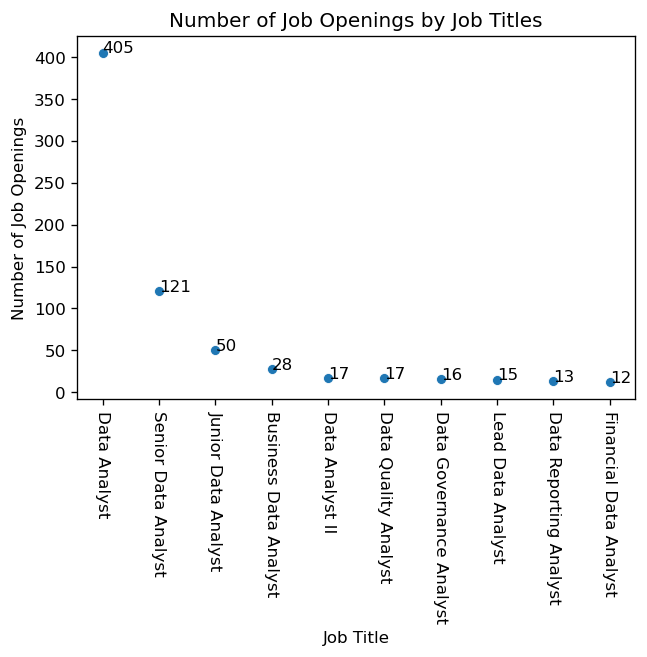

In [147]:
plt.figure(figsize=(6, 4), dpi=(120))
sns.scatterplot(x=a.index, y=a.values)
plt.title("Number of Job Openings by Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Number of Job Openings")
for i, ii in enumerate(a):
    plt.text(i, ii, str(ii))
plt.xticks(rotation=270);

Based on oor observation from the scatterplot above we can say that:

- Data Analyst
- Senior Data Analyst
- Junior Data Analyst
- Business Data Analyst are the most used titles in the job advertisements.

Let's see **Job Openings based on Industry**. Top 10 job titles in data analyst job advertisements.

In [139]:
b = df_analyis["Industry"].value_counts()[:10]
b

IT Services                                325
Staffing & Outsourcing                     322
Health Care Services & Hospitals           151
Computer Hardware & Software               111
Consulting                                 111
Investment Banking & Asset Management       78
Enterprise Software & Network Solutions     69
Internet                                    65
Advertising & Marketing                     51
Banks & Credit Unions                       51
Name: Industry, dtype: int64

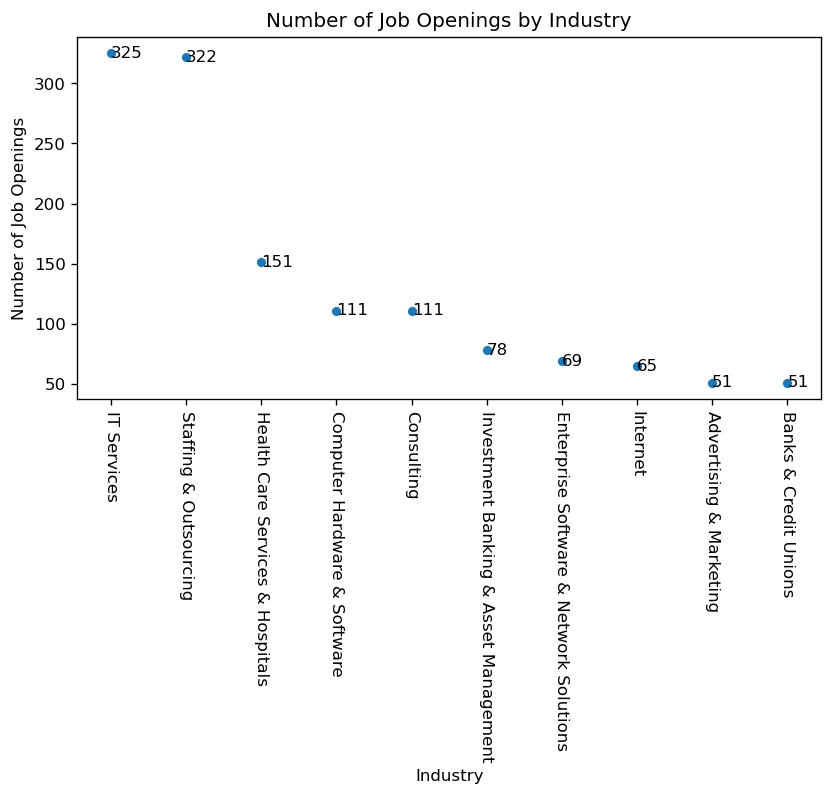

In [148]:
plt.figure(figsize=(8, 4), dpi=(120))
sns.scatterplot(x=b.index, y=b.values)
plt.title("Number of Job Openings by Industry")
plt.xlabel("Industry")
plt.ylabel("Number of Job Openings")
for i, ii in enumerate(b):
    plt.text(i, ii, str(ii), va="center")
plt.xticks(rotation=270);

As shown in the plot;

- IT Services
- Staffing & Outsourcing
- Health Care Services & Hospitals
- Consulting
- Computer Hardware & Software are the most data analyst job opening advertised industries.

Let's see **Job Openings based on Sector**. Top 10 job titles in data analyst job advertisements.

In [149]:
c = df_analyis["Sector"].value_counts()[:10]
c

Information Technology    570
Business Services         523
Finance                   169
Health Care               151
Education                  52
Insurance                  51
Accounting & Legal         43
Media                      42
Manufacturing              40
Retail                     38
Name: Sector, dtype: int64

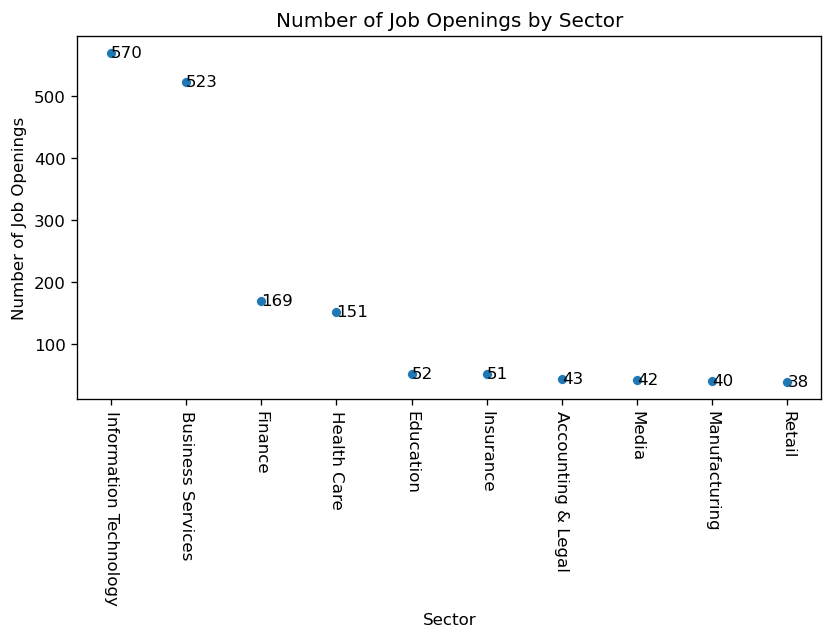

In [150]:
plt.figure(figsize=(8, 4), dpi=(120))
sns.scatterplot(x=c.index, y=c.values)
plt.title("Number of Job Openings by Sector")
plt.xlabel("Sector")
plt.ylabel("Number of Job Openings")
for i, ii in enumerate(c):
    plt.text(i, ii, str(ii), va="center")
plt.xticks(rotation=270);

As shown in the plot;

- Information Technology
- Business Services
- Finance
- Health Care are the most data analyst job opening advertised sectors.

Let's see **programming laguage skills** required by Job Titles

In [163]:
lang_skills = df_analyis[["Job Title", "python", "Excel", "SQL", "Tableau"]]
lang_skills_1 = lang_skills.groupby("Job Title")[["python", "Excel", "SQL", "Tableau"]].sum().sort_values(by="python", ascending=False)[:10]
lang_skills_1['number_of_job_openings'] = df_analyis['Job Title'].value_counts()[:10].values
lang_skills_1

,python,Excel,SQL,Tableau,number_of_job_openings
Job Title,,,,,
Data Analyst,125,239,301,110,405
Senior Data Analyst,68,67,104,64,121
Business Data Analyst,11,17,21,11,50
NY Healthcare Data/Reporting Analyst,5,5,5,5,28
Marketing Data Analyst,5,6,9,5,17
Data Analyst III (Healthcare Analytics),5,5,5,5,17
Lead Data Analyst,5,7,13,10,16
TX Healthcare Data/Reporting Analyst,4,4,4,4,15
"Data Analyst, Data & Analytics (Advanced Analytics) Manager (Multiple Positions)",4,0,4,4,13


Based on the job advertisements' requirements, we can safely assume that, SQL and Excel keeps their importance. As a programming language Python is required almost 1 out of 3 times in the job advertisemenst, same is also true for visualiztion tool Tableau.

In [169]:
lang_skills_1.index

Index(['Data Analyst', 'Senior Data Analyst', 'Business Data Analyst',
       'NY Healthcare Data/Reporting Analyst', 'Marketing Data Analyst',
       'Data Analyst III (Healthcare Analytics)', 'Lead Data Analyst',
       'TX Healthcare Data/Reporting Analyst',
       'Data Analyst, Data & Analytics (Advanced Analytics) Manager (Multiple Positions)',
       'Healthcare Data/Reporting Analyst'],
      dtype='object', name='Job Title')

In [170]:
fig = px.bar(data_frame=lang_skills_1, x=lang_skills_1.index, y=["python", "Excel", "SQL", "Tableau"], title="Programming Languages")
fig.show()

And finally, let's see **Salary Distributions by Company Names**.

In [173]:
fig = px.scatter(df_analyis, x="Salary Minimum", y="Company Name", color="Rating", hover_data=['Industry', 'Job Title'], 
title = "Minimum Salary by Company Name with Rating Scores")
fig.show()

In [175]:
fig = px.scatter(df_analyis, x="Salary Maximum", y="Company Name", color="Rating", hover_data=['Industry', 'Job Title'], 
title = "Maximum Salary by Company Name with Rating Scores")
fig.show()

In [176]:
fig = px.scatter(df_analyis, x="Salary Average", y="Company Name", color="Rating", hover_data=['Industry', 'Job Title'], 
title = "Average Salary by Company Name with Rating Scores")
fig.show()

That was the final step of our EDA. Hope you have fun reading and studying it. 